### 1.

The mathematical formula for a linear Support Vector Machine (SVM) can be represented as follows:

Given a set of labeled training data points (xᵢ, yᵢ) where xᵢ represents the input features and yᵢ represents the corresponding class labels (-1 or +1), the linear SVM aims to find a hyperplane that maximally separates the two classes.

The decision function of a linear SVM can be written as:

f(x) = w·x + b

where:

- f(x) is the decision function for a given input x.
- w is the weight vector perpendicular to the hyperplane.
- · represents the dot product between vectors.
- b is the bias term, also known as the intercept.

### 2.

The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that separates the two classes in a binary classification problem. The goal is to maximize the margin between the classes while minimizing the classification error.

Mathematically, the objective function of a linear SVM can be expressed as:

minimize: (1/2) * ||w||^2 + C * Σ(max(0, 1 - yi * (w^T * xi + b)))

subject to: yi * (w^T * xi + b) >= 1 for all training examples (xi, yi)

In this objective function:

- w represents the weight vector of the hyperplane.
- b is the bias term.
- xi is a training example.
- yi is the corresponding class label (+1 or -1) for xi.
- C is the regularization parameter that controls the trade-off between maximizing the margin and allowing for misclassifications.

### 3.

The kernel trick is a technique used in Support Vector Machines (SVM) to transform input data into higher-dimensional feature spaces without explicitly calculating the coordinates of the data points in that space. It allows SVMs to efficiently solve nonlinear classification and regression problems.

In SVM, the goal is to find a hyperplane that separates the data points of different classes with the largest margin. In linear SVM, the data points are mapped to a higher-dimensional space using a linear function. However, some datasets may not be linearly separable in their original feature space.

### 4.

In Support Vector Machines (SVM), support vectors play a crucial role in defining the decision boundary and maximizing the margin between different classes. Support vectors are the data points from the training set that are closest to the decision boundary, which are the most difficult examples to classify correctly.

To explain the role of support vectors in SVM, let's consider a binary classification problem with two classes: class A and class B. We want to find a decision boundary that separates the two classes as accurately as possible. SVM aims to find the hyperplane that maximizes the margin between the two classes.

Here's an example: Imagine a dataset with points from class A and class B plotted on a 2D plane. The goal is to find a straight line (decision boundary) that separates the two classes. The line should be positioned in such a way that it maximizes the distance to the nearest points of both classes.

In SVM, the support vectors are the points that lie closest to the decision boundary or lie on the margin. These points play a crucial role because they define the position and orientation of the decision boundary. The decision boundary is chosen to ensure that the margin is maximized while still correctly separating the two classes.

### 5.

Hyperplane: In SVM, a hyperplane is a decision boundary that separates data points of different classes. It is a multidimensional extension of a line in two dimensions or a plane in three dimensions. In a binary classification problem, a hyperplane divides the feature space into two regions, one for each class. The goal of SVM is to find the optimal hyperplane that maximally separates the classes.

Marginal Plane: The marginal plane, also known as the maximum-margin hyperplane, is the hyperplane that lies exactly between the support vectors of the two classes in SVM. Support vectors are the data points that are closest to the decision boundary. The marginal plane maximizes the distance between the support vectors of different classes, which provides a wider margin and better generalization.

Soft Margin: In some cases, it may not be possible to find a hyperplane that perfectly separates the classes due to overlapping or noisy data. In such situations, SVM allows for a soft margin, which allows some data points to be misclassified or fall within the margin. The soft margin is a more flexible approach that introduces a penalty for misclassification or data points within the margin. The degree of flexibility is controlled by a parameter called C, which trades off the margin size and the number of misclassifications.

Hard Margin: In contrast to the soft margin, the hard margin SVM requires that all training examples be correctly classified, and the margin should be maximized without allowing any misclassifications or data points within the margin. The hard margin SVM is more prone to overfitting and may not work well with noisy or overlapping data.

### 6.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
iris = load_iris()

In [17]:
X = iris.data
y = iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.svm import SVC

In [20]:
svc= SVC(kernel='linear')

In [21]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
y_pred = svc.predict(X_test)

In [23]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy = accuracy_score(y_test,y_pred)

In [26]:
print(accuracy)

1.0


In [29]:
# Index of the first and second feature

feature_index1 = 0
feature_index2 = 1  

x_min, x_max = X[:, feature_index1].min() - 1, X[:, feature_index1].max() + 1
y_min, y_max = X[:, feature_index2].min() - 1, X[:, feature_index2].max() + 1

In [30]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

In [37]:
# Make predictions on the meshgrid
a = svc.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
Z = a.reshape(xx.shape)

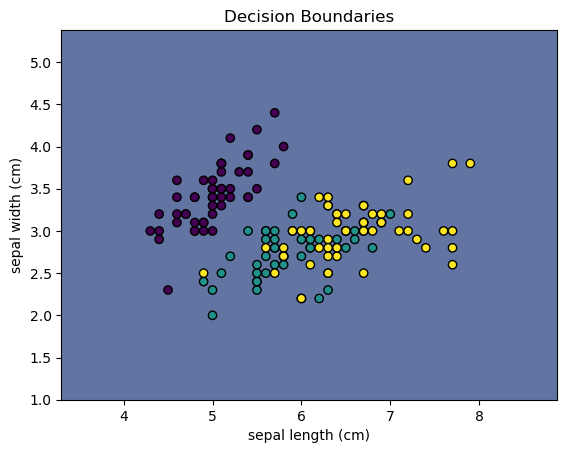

In [45]:
## Create a plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, feature_index1], X[:, feature_index2], c=y, edgecolors='k')
plt.xlabel(iris.feature_names[feature_index1])
plt.ylabel(iris.feature_names[feature_index2])
plt.title("Decision Boundaries")
plt.show()

In [41]:
C_values = [0.1, 1, 10]  # List of different C values

for i in C_values:
    # Train a linear SVM classifier with the specified C value
    svm = SVC(kernel='linear', C=i)
    svm.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = svm.predict(X_test)

    # Compute the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("C =", i, ", Accuracy:", accuracy)

C = 0.1 , Accuracy: 1.0
C = 1 , Accuracy: 1.0
C = 10 , Accuracy: 0.9666666666666667
